# Logistic Regression
- Binary Classification
- Evaluation Methods

In [1]:
# Get working directory
import os
os.getcwd()

'C:\\Users\\roger\\OneDrive\\Github\\Data-Mining'

## 1. Load Data

In [2]:
# Read in csv file for ibm_telco that is stored in path:
import pandas as pd
pd.set_option('display.max_columns', None)
url = 'https://raw.githubusercontent.com/RogerCui-GitHub/Data-Mining/master/datasets/ibm_telco.csv'
ibm_telco = pd.read_csv(url) #'./datasets/ibm_telco.csv')

## 2. View Data

In [3]:
#Preview the dataset
ibm_telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# We again see that the describe function only describes continuous variables
ibm_telco.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
#Check dataframe shape
ibm_telco.shape

(7043, 21)

In [6]:
#Check nulls per column
ibm_telco.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Check datatypes
ibm_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.1 Unique Values

In [8]:
#It is usually useful to see the unique values for categorical variables that may not be obvious
ibm_telco.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [9]:
ibm_telco.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
ibm_telco.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
ibm_telco.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
ibm_telco.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [13]:
ibm_telco.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [14]:
ibm_telco.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
ibm_telco.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [16]:
ibm_telco.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
ibm_telco.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
#Interestingly, TotalCharges is a categorical variable.  We may be able to convert this to numeric
ibm_telco.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### 2.1.1 It's important to understand the true proportion of our target, which in this case is customer churn:

In [19]:
a = ibm_telco.groupby('Churn')['customerID'].nunique()
a

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64

In [20]:
# % of churned:
a[1] / sum(a)

0.2653698707936959

In [21]:
# % of not churned
a[0] / sum(a)

0.7346301292063041

## 3. Handling categorical predictors:

There are different techniques when it comes to handling categorical data in python, such as:
- Replacing values
- Encoding labels
- one-hot encoding

Let's look at a couple of these examples as to how we can use these different methods, and then extend that logic for the rest of the categorical features

### 3.1 Replacing values

For replacing features, we have to first create a dictionary that contains mapping numbers for each category in the column.  The easiest example for this is with the gender column.  As we will see, this could be a tedious process for columns with many different categories

In [22]:
gender_map = {'gender': {'Male': 1, 'Female': 2}}

In [23]:
gender_map

{'gender': {'Male': 1, 'Female': 2}}

In [24]:
ibm_telco_replace_ex_df = ibm_telco.copy()

In [25]:
labels = ibm_telco_replace_ex_df['gender'].astype('category').cat.categories.tolist()

In [26]:
replace_map_comp = {'gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [27]:
ibm_telco_replace_ex_df.replace(replace_map_comp, inplace=True)

In [28]:
ibm_telco_replace_ex_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,2,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### 3.2 Label encoding:

In [29]:
ibm_telco_le_ex = ibm_telco.copy()

ibm_telco_le_ex['gender'] = ibm_telco_le_ex['gender'].astype('category')
ibm_telco_le_ex['gender_le'] = ibm_telco_le_ex['gender'].cat.codes
ibm_telco_le_ex.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_le
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1


In [30]:
#### We can also on-hot these variables.  let's do this with the Partner column:
ibm_telco_onehot_ex = ibm_telco.copy()

ibm_telco_onehot_ex = pd.get_dummies(ibm_telco_onehot_ex, columns = ['Partner'], prefix = 'Partner')

ibm_telco_onehot_ex.head(3)

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
1,5575-GNVDE,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0


## 4. Logistic Regression

As we walk through our logistic regression example(s), we will label encode our categorical variables for the sake of time.

In [31]:
ibm_telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### 4.1 Encode categorical variables

In [32]:
# Contingent on memory, I like to keep the original column values in case we need them again or make a mistake as we continue coding

ibm_telco['gender'] = ibm_telco['gender'].astype('category')
ibm_telco['gender_le'] = ibm_telco['gender'].cat.codes

ibm_telco['Partner'] = ibm_telco['Partner'].astype('category')
ibm_telco['Partner_le'] = ibm_telco['Partner'].cat.codes

ibm_telco['Dependents'] = ibm_telco['Dependents'].astype('category')
ibm_telco['Dependents_le'] = ibm_telco['Dependents'].cat.codes

ibm_telco['PhoneService'] = ibm_telco['PhoneService'].astype('category')
ibm_telco['PhoneService_le'] = ibm_telco['PhoneService'].cat.codes

ibm_telco['MultipleLines'] = ibm_telco['MultipleLines'].astype('category')
ibm_telco['MultipleLines_le'] = ibm_telco['MultipleLines'].cat.codes

ibm_telco['InternetService'] = ibm_telco['InternetService'].astype('category')
ibm_telco['InternetService_le'] = ibm_telco['InternetService'].cat.codes

ibm_telco['OnlineSecurity'] = ibm_telco['OnlineSecurity'].astype('category')
ibm_telco['OnlineSecurity_le'] = ibm_telco['OnlineSecurity'].cat.codes

ibm_telco['OnlineBackup'] = ibm_telco['OnlineBackup'].astype('category')
ibm_telco['OnlineBackup_le'] = ibm_telco['OnlineBackup'].cat.codes

ibm_telco['DeviceProtection'] = ibm_telco['DeviceProtection'].astype('category')
ibm_telco['DeviceProtection_le'] = ibm_telco['DeviceProtection'].cat.codes

ibm_telco['TechSupport'] = ibm_telco['TechSupport'].astype('category')
ibm_telco['TechSupport_le'] = ibm_telco['TechSupport'].cat.codes

ibm_telco['StreamingTV'] = ibm_telco['StreamingTV'].astype('category')
ibm_telco['StreamingTV_le'] = ibm_telco['StreamingTV'].cat.codes

ibm_telco['StreamingMovies'] = ibm_telco['StreamingMovies'].astype('category')
ibm_telco['StreamingMovies_le'] = ibm_telco['StreamingMovies'].cat.codes

ibm_telco['Contract'] = ibm_telco['Contract'].astype('category')
ibm_telco['Contract_le'] = ibm_telco['Contract'].cat.codes

ibm_telco['PaperlessBilling'] = ibm_telco['PaperlessBilling'].astype('category')
ibm_telco['PaperlessBilling_le'] = ibm_telco['PaperlessBilling'].cat.codes

ibm_telco['PaymentMethod'] = ibm_telco['PaymentMethod'].astype('category')
ibm_telco['PaymentMethod_le'] = ibm_telco['PaymentMethod'].cat.codes

In [33]:
ibm_telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3


#### We will also have to convert the target to a numerical value, although it's a category.  Since this is so important, we will not use the label encoder for this.  Instead, we will do this manually

In [34]:
ibm_telco['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
import numpy as np
ibm_telco['CHURN'] = np.where(ibm_telco['Churn'] == 'Yes', 1, 0)

In [36]:
target = ibm_telco[['CHURN', 'customerID']]

In [37]:
ibm_telco_vars = ibm_telco.drop(['Churn', 'CHURN', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                'PaperlessBilling', 'PaymentMethod'], axis=1)

In [38]:
ibm_telco_processed = ibm_telco.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                'PaperlessBilling', 'PaymentMethod'], axis=1)
ibm_telco_processed.to_csv('./datasets/ibm_telco_processed.csv', index=False)

In [39]:
ibm_telco_vars.head(3)

,tenure,MonthlyCharges,TotalCharges,gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,34,56.95,1889.5,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3


In [40]:
# We are going to convert the TotalCharges to numeric.  However, there are blank spaces in the column, which will
# cause errors as we are trying to convert it.  We can coerce these errors for now, which will make these black observations
# null, but we will have to either impute values for the logistic regression, or, drop the records.

#For simplicity, we will impute
ibm_telco_vars['TotalCharges'] = ibm_telco_vars['TotalCharges'].apply(pd.to_numeric, errors = 'coerce')

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

ibm_telco_vars['TotalCharges'] = ibm_telco_vars['TotalCharges'].fillna(ibm_telco_vars['TotalCharges'].mean())

In [41]:
ibm_telco_vars.dtypes

tenure                   int64
MonthlyCharges         float64
TotalCharges           float64
gender_le                 int8
Partner_le                int8
Dependents_le             int8
PhoneService_le           int8
MultipleLines_le          int8
InternetService_le        int8
OnlineSecurity_le         int8
OnlineBackup_le           int8
DeviceProtection_le       int8
TechSupport_le            int8
StreamingTV_le            int8
StreamingMovies_le        int8
Contract_le               int8
PaperlessBilling_le       int8
PaymentMethod_le          int8
dtype: object

In [42]:
# Again, we split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ibm_telco_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

#### Since we are doing classification, we want to make sure the distribution of our target is in our train and test sets are not only similar to one another, but similar to our population as a whole:

In [43]:
y_train.groupby('CHURN')['customerID'].nunique()

CHURN
0    4113
1    1521
Name: customerID, dtype: int64

In [44]:
1521/(1521+4113)

0.26996805111821087

In [45]:
y_test.groupby('CHURN')['customerID'].nunique()

CHURN
0    1061
1     348
Name: customerID, dtype: int64

In [46]:
348/(348+1061)

0.24698367636621718

#### We can see that our dataset is imbalanced.  Sometimes, we may want to downsample the negative class or upsample the positive class.  For the sake of time, we will not do this during this exercise.  Can anyone thinkn as to why we would want to do this?

### 4.2 Model Creation

In [47]:
from sklearn.linear_model import LogisticRegression
#from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Create logistic regression object
clf = LogisticRegression(solver='saga', max_iter=2000, random_state=0)

In [48]:
x_train_vars_only = x_train.apply(pd.to_numeric)

In [49]:
x_train.dtypes

tenure                   int64
MonthlyCharges         float64
TotalCharges           float64
gender_le                 int8
Partner_le                int8
Dependents_le             int8
PhoneService_le           int8
MultipleLines_le          int8
InternetService_le        int8
OnlineSecurity_le         int8
OnlineBackup_le           int8
DeviceProtection_le       int8
TechSupport_le            int8
StreamingTV_le            int8
StreamingMovies_le        int8
Contract_le               int8
PaperlessBilling_le       int8
PaymentMethod_le          int8
dtype: object

In [50]:
y_train.loc[:,'CHURN'] = y_train.loc[:,'CHURN'].apply(pd.to_numeric)

c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
# Train model
model = clf.fit(x_train_vars_only, y_train['CHURN'])

In [52]:
#We can look at our model's coefficients for respective columns
model.coef_

array([[-0.10098493,  0.00951035,  0.00059922, -0.00421846, -0.00269245,
        -0.00500643, -0.00732269,  0.00495574, -0.00830803, -0.01753765,
        -0.0111433 , -0.01031499, -0.01790369, -0.00428881, -0.00337046,
        -0.01368535,  0.00277715, -0.01478903]])

In [53]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_le,Partner_le,Dependents_le,PhoneService_le,MultipleLines_le,InternetService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,Contract_le,PaperlessBilling_le,PaymentMethod_le
1814,12,19.70,258.35,1,1,1,1,0,2,1,1,1,1,1,1,2,0,3
5946,42,73.90,3160.55,0,0,0,1,0,0,2,2,2,2,0,2,1,0,1
3881,71,65.15,4681.75,1,1,0,1,2,0,2,2,0,2,0,0,2,0,0
2389,71,85.45,6300.85,1,1,1,1,2,0,2,0,2,2,2,2,1,0,2
3676,30,70.40,2044.75,1,0,0,1,0,0,2,2,0,2,2,0,1,0,2


In [54]:
# We can also perform logistic regression with the statsmodels package
import statsmodels.api as sm
logit_model=sm.Logit(y_train['CHURN'], x_train_vars_only)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.422386
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.276    
Dependent Variable:   CHURN             AIC:               4795.4427
Date:                 2020-09-09 12:10  BIC:               4914.9011
No. Observations:     5634              Log-Likelihood:    -2379.7  
Df Model:             17                LL-Null:           -3285.9  
Df Residuals:         5616              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       8.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
tenure              -0.0677   0.0058 -11.6773 0.0000 -0.0791 -0.0563
MonthlyCharges       0.0212 

### So far, we have done no variable selection.  We can perform this using scikit-learn's LogisticRegressionCV function.  We also haven't cross-validated against test data as we always should.  We will do that now.

This function implements logistic regression using liblinear, newton-cg, sag oflbfgs optimizer.

What is important to remember these optimizers is the following:
- liblinear solver supports L1 and L2 regularization, with a dual formulation only for the L2 penalty
- Elastic-net penalty is only supported by the saga solver

In [55]:
# let's perform logistic regressino using elastic-net
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.1, 0.2, 0.3],
                           Cs = 100,
                           n_jobs = -1,
                           random_state = 0,
                           max_iter=2000
                           #class_weight = ???
)

In [56]:
# We may want to explore scaling the variables since alpha is impacted by the different scales of variables
scaler = StandardScaler()
x_train_vars_only_s = scaler.fit_transform(x_train_vars_only)

scaler = StandardScaler()
x_test_vars_only_s = scaler.fit_transform(x_test)

In [57]:
clf_model = clf.fit(x_train_vars_only, y_train['CHURN'])

In [58]:
clf_model_scaled = clf.fit(x_train_vars_only_s, y_train['CHURN'])

In [59]:
# We can examine our new coefficients
clf_model.coef_

array([[-1.12038355,  0.75667283,  0.36377797, -0.01309424,  0.0226381 ,
        -0.05369585, -0.26379032,  0.06556684,  0.17370184, -0.22283778,
        -0.12400696, -0.08723538, -0.21907526, -0.01796643,  0.02045708,
        -0.59682653,  0.17133993,  0.04889758]])

In [60]:
clf_model_scaled.coef_

array([[-1.12038355,  0.75667283,  0.36377797, -0.01309424,  0.0226381 ,
        -0.05369585, -0.26379032,  0.06556684,  0.17370184, -0.22283778,
        -0.12400696, -0.08723538, -0.21907526, -0.01796643,  0.02045708,
        -0.59682653,  0.17133993,  0.04889758]])

In [61]:
# Let's fit an assess the results in terms of AUC on our training data
x_train_probs = clf_model.predict_proba(x_train_vars_only)

In [62]:
x_train_probs_s = clf_model_scaled.predict_proba(x_train_vars_only_s)

In [63]:
import numpy as np
x_train_probs.shape

(5634, 2)

In [64]:
x_train_probs_s

array([[0.96530256, 0.03469744],
       [0.96521474, 0.03478526],
       [0.99379365, 0.00620635],
       ...,
       [0.3700954 , 0.6299046 ],
       [0.50715866, 0.49284134],
       [0.96248513, 0.03751487]])

In [65]:
# Let's convert the array to a dataframe so that we can see what our probabilities look like
x_train_probs_df = pd.DataFrame(x_train_probs)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df.head()

,trainprobs0,trainprobs1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [66]:
x_train.loc[:,'predictions_1s'] = x_train_probs_s[:,1]

c:\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
# We can insert our predictions into the original x_train dataframe:
x_train.loc[:,'predictions_1'] = x_train_probs[:,1]

In [68]:
# Let's see hwo our model performed in terms of AUC on our training data
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train['CHURN'], x_train['predictions_1'])
metrics.auc(fpr, tpr)

0.49213994593560323

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['CHURN'], x_train['predictions_1s'])
metrics.auc(fpr, tpr)

0.8432853416301769

In [70]:
# It is important to make sure our AUC on train is not overfit and the model performs well on unseen data.  
# This is where our test set comes in.  Let's fit the model on our test set and examine the results:
# Let's fit an assess the results in terms of AUC on our training data
x_test_probs = clf_model.predict_proba(x_test)
x_test_probs_s = clf_model_scaled.predict_proba(x_test_vars_only_s)

In [71]:
x_test.loc[:,'predictions_1'] = x_test_probs[:,1]
x_test.loc[:,'predictions_1s'] = x_test_probs_s[:,1]

c:\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['CHURN'], x_test['predictions_1'])
metrics.auc(fpr, tpr)

0.4979321719912899

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['CHURN'], x_test['predictions_1s'])
metrics.auc(fpr, tpr)

0.8548146402764687

In [74]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(10,10)})

In [75]:
y_train_r = y_train['CHURN']

In [76]:
y_pred_prob_train = x_train['predictions_1']

In [77]:
from sklearn.metrics import roc_curve
roc_curve(y_train_r, x_train['predictions_1'])[1]

array([0.        , 0.94345825, 0.94543064, 0.94543064, 0.94543064,
       0.9460881 , 0.9460881 , 0.94674556, 0.94674556, 0.94740302,
       0.94740302, 0.94740302, 0.94806049, 0.94806049, 0.94871795,
       0.94871795, 0.95003287, 0.95003287, 0.95069034, 0.95069034,
       0.9513478 , 0.9513478 , 0.95200526, 0.95200526, 0.95266272,
       0.95266272, 0.95332018, 0.95332018, 0.95397765, 0.95397765,
       0.95463511, 0.95463511, 0.9566075 , 0.95726496, 0.95792242,
       0.95792242, 0.96055227, 0.96055227, 0.96120973, 0.96120973,
       0.96252465, 0.96252465, 0.96318212, 0.96318212, 0.96449704,
       0.96449704, 0.9651545 , 0.9651545 , 0.96646943, 0.96646943,
       0.96712689, 0.96712689, 0.96778435, 0.96909928, 0.96909928,
       0.96975674, 0.96975674, 0.96975674, 0.9704142 , 0.97107166,
       0.97172913, 0.97172913, 0.97435897, 0.97435897, 0.9756739 ,
       0.9756739 , 0.97633136, 0.97633136, 0.97764629, 0.97764629,
       0.97830375, 0.97830375, 0.97961867, 0.98027613, 0.98093

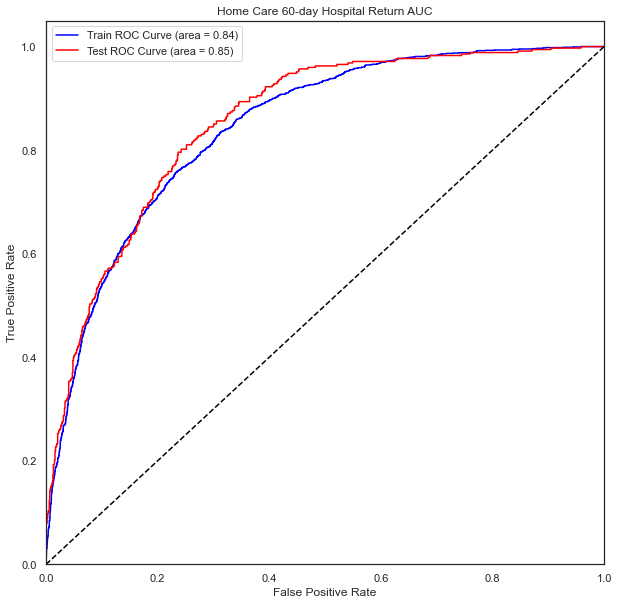

In [78]:
# We can visualize these ROC curves with matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train_r, x_train['predictions_1s'])[0],roc_curve(y_train_r, x_train['predictions_1s'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train_r, x_train['predictions_1s']))

plt.plot(roc_curve(y_test['CHURN'], x_test['predictions_1s'])[0],roc_curve(y_test['CHURN'], x_test['predictions_1s'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test['CHURN'], x_test['predictions_1s']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Home Care 60-day Hospital Return AUC')
plt.legend()
plt.show()

### Now that we know thta we have a reliable model, in many cases, we will have to decide on a threshold of discrimination.  Let's make our first threshold at 0.5

In [79]:
x_test.loc[:,'resp'] = x_test.loc[:,'predictions_1'].map(lambda x: 1 if x > 0.5 else 0)

c:\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
# I personally like to use pandas 'crosstab' function so that I can produce a more readable confusion matrix
pd.crosstab(y_test['CHURN'], x_test['resp'],
            rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
0,1061,1061
1,348,348
All,1409,1409


In [81]:
# Sensitivity: 
325/913

0.3559693318729463

In [82]:
# Specificity
473/496

0.9536290322580645

In [83]:
# PPV
325/348

0.9339080459770115

In [84]:
# NPV
473/1061

0.4458058435438266

In [85]:
# Accuracy: 
(193+916)/1409

0.78708303761533

In [86]:
# F1-score:
(2*325)/((2*325)+588+23)

0.5154639175257731

#### We can also create a threshold to maximize sensitivity and specificity

In [87]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [88]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test['CHURN'], x_test['predictions_1s'])
print(threshold)

[0.33939033129731744]


In [89]:
x_test.loc[:,'lgbm_resp2'] = x_test.loc[:,'predictions_1s'].map(lambda x: 1 if x > 0.3528569527903856 else 0)

c:\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [90]:
# Remake our confusion matrix to see new results:
pd.crosstab(y_test['CHURN'], x_test['lgbm_resp2'],
            rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,829,232,1061
1,84,264,348
All,913,496,1409


### Explore other thresholds for threshold of discrimination

## It is important that we explore the utility of different models and methods.  We can also try LASSO and Ridge and compare these results to our elastic net results.

#### RIDGE:

In [91]:
# Since the value of alpha impacts the variables based on their original scale, we will perform ridge on the scaled x variables
# We can still use the LogisticRegressionCV function to do this
x_test_vars_only_s

array([[ 0.33598691,  0.50476053,  0.45321823, ...,  0.35439593,
         0.81095441, -1.43897939],
       [ 1.35336326,  1.25567324,  1.84392195, ...,  1.5433099 ,
         0.81095441, -1.43897939],
       [-0.84416965, -0.65574094, -0.78094251, ..., -0.83451804,
         0.81095441, -1.43897939],
       ...,
       [ 1.55683852, -0.35770685,  0.70385472, ...,  1.5433099 ,
        -1.23311494, -1.43897939],
       [ 1.3126682 ,  0.70122993,  1.49817688, ..., -0.83451804,
         0.81095441,  0.42970444],
       [-0.64069438,  1.31561306, -0.24288391, ..., -0.83451804,
         0.81095441,  0.42970444]])

In [92]:
clf_ridge = LogisticRegressionCV(solver = 'lbfgs',
                           penalty = 'l2',
                           Cs = 100,
                           n_jobs = -1,
                           random_state = 0
)

In [93]:
ridge_model_scaled = clf_ridge.fit(x_train_vars_only_s, y_train['CHURN'])

In [94]:
# We can see that none of the variable coefficients reach zero
ridge_model_scaled.coef_

array([[-0.8871925 ,  0.74825507,  0.14859152, -0.01679298,  0.0217208 ,
        -0.06309468, -0.23496285,  0.07449264,  0.16397739, -0.22534827,
        -0.12555805, -0.08808928, -0.22010374, -0.01370353,  0.03249369,
        -0.58431996,  0.17466926,  0.05858816]])

In [95]:
x_train_probs_ridge = ridge_model_scaled.predict_proba(x_train_vars_only_s)
x_test_probs_ridge = ridge_model_scaled.predict_proba(x_test_vars_only_s)

In [96]:
x_train.loc[:,'ridge_preds'] =  x_train_probs_ridge[:,1]
x_test.loc[:,'ridge_preds'] = x_test_probs_ridge[:,1]

c:\python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['CHURN'], x_train['ridge_preds'])
metrics.auc(fpr, tpr)

0.842432542988005

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['CHURN'], x_test['ridge_preds'])
metrics.auc(fpr, tpr)

0.8542675528399797

#### LASSO:

In [99]:
clf_lasso = LogisticRegressionCV(solver = 'liblinear',
                           penalty = 'l1',
                           Cs = 200,
                           n_jobs = -1,
                           random_state = 0
)

In [100]:
lasso_model_scaled = clf_lasso.fit(x_train_vars_only_s, y_train['CHURN'])

In [101]:
# We can see that none of the variable coefficients reach zero
lasso_model_scaled.coef_

array([[-0.97384795,  0.77631476,  0.19733823, -0.00405519,  0.00540673,
        -0.04047114, -0.24082   ,  0.06375886,  0.15395251, -0.2151329 ,
        -0.11188278, -0.07507488, -0.21292325,  0.        ,  0.01160874,
        -0.58026067,  0.16380475,  0.03846456]])

In [102]:
x_train_probs_lasso = lasso_model_scaled.predict_proba(x_train_vars_only_s)
x_test_probs_lasso = lasso_model_scaled.predict_proba(x_test_vars_only_s)

In [122]:
x_train.loc[:,'lasso_preds'] =  x_train_probs_lasso[:,1]
x_test.loc[:,'lasso_preds'] = x_test_probs_lasso[:,1]

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['CHURN'], x_train['lasso_preds'])
metrics.auc(fpr, tpr)

0.84255275003185

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['CHURN'], x_test['lasso_preds'])
metrics.auc(fpr, tpr)

0.854010259243611